<div class="alert alert-block alert-info">
    <b>この章の目的</b>
    <p>HSRのセンサ情報へのアクセス方法を学習します。センサ値をもとに台車を制御してみます。</p>
</div> 

# センサ情報の確認方法

HSRには、レーザスキャナ、カメラ、デプスセンサ、IMUなどの様々なセンサが搭載されており、ROSの「トピック」として各センサ情報にアクセスできます。

アクセス可能なトピック一覧は、「rostopic list」コマンドで確認できます。

In [31]:
!rostopic list

/amcl/parameter_descriptions
/amcl/parameter_updates
/amcl_pose
/attached_collision_object
/clicked_point
/clock
/collision_object
/execute_trajectory/cancel
/execute_trajectory/feedback
/execute_trajectory/goal
/execute_trajectory/result
/execute_trajectory/status
/gazebo/link_states
/gazebo/model_states
/gazebo/parameter_descriptions
/gazebo/parameter_updates
/gazebo/set_link_state
/gazebo/set_model_state
/gazebo_gui/parameter_descriptions
/gazebo_gui/parameter_updates
/gazebo_ros_control/pid_gains/arm_flex_joint/parameter_descriptions
/gazebo_ros_control/pid_gains/arm_flex_joint/parameter_updates
/gazebo_ros_control/pid_gains/arm_lift_joint/parameter_descriptions
/gazebo_ros_control/pid_gains/arm_lift_joint/parameter_updates
/gazebo_ros_control/pid_gains/arm_roll_joint/parameter_descriptions
/gazebo_ros_control/pid_gains/arm_roll_joint/parameter_updates
/gazebo_ros_control/pid_gains/base_l_drive_wheel_joint/parameter_descriptions
/gazebo_ros_control/pid_gains/base_l_drive_wheel_join

rvizを使ってトピックとしてアクセスできるセンサ情報を視覚的に確認してみましょう。

まずは、rvizを起動します。

次に、「Add」ボタンを使って「RobotModel」を追加します。

次に、「Add」ボタンを押すと出てくる画面から「By topic」タブを開いて、興味のあるトピックを選択してください。

In [29]:
!import -window root /tmp/screen.png

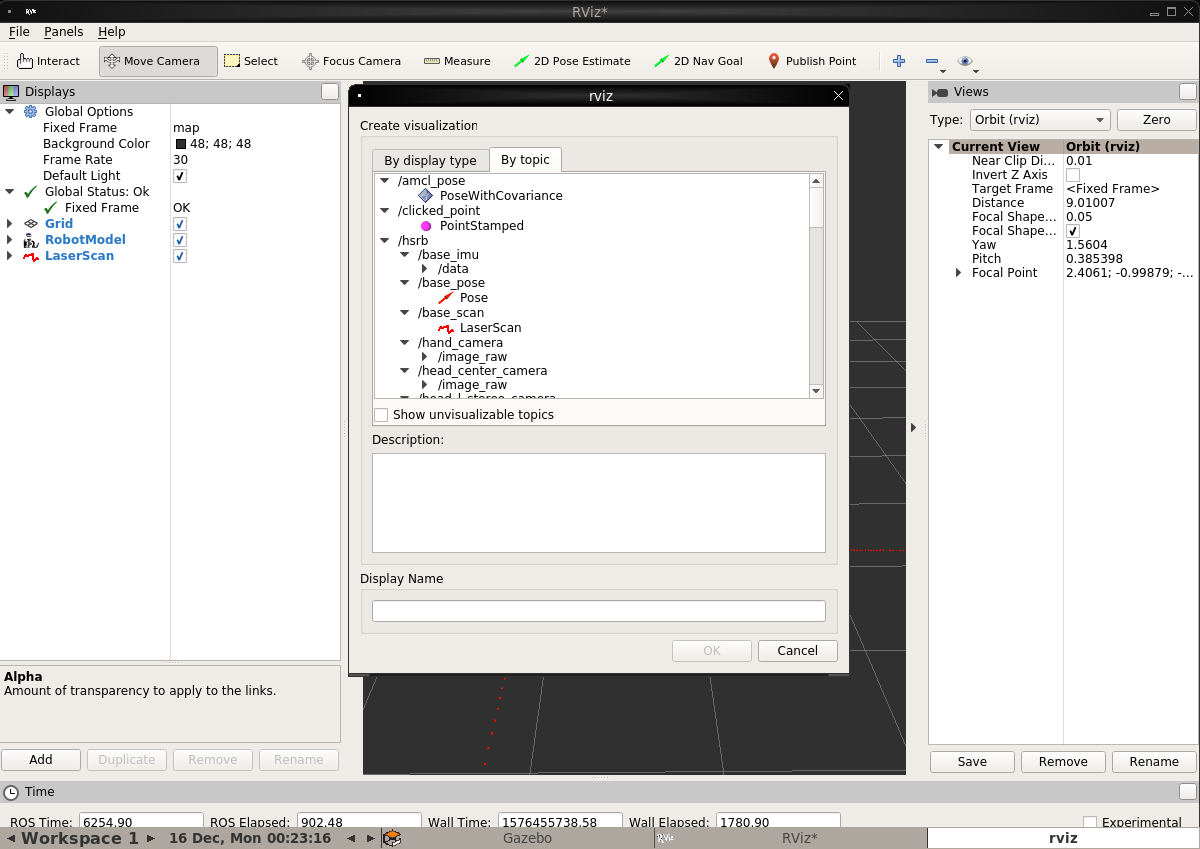

In [30]:
from IPython.display import Image
with open('/tmp/screen.png','rb') as file:
    display(Image(data=file.read()))

例えば、「/hsrb/base_scan」トピックを選択すると、以下のようにレーザスキャナの値が視覚化されます。

In [32]:
!import -window root /tmp/screen.png

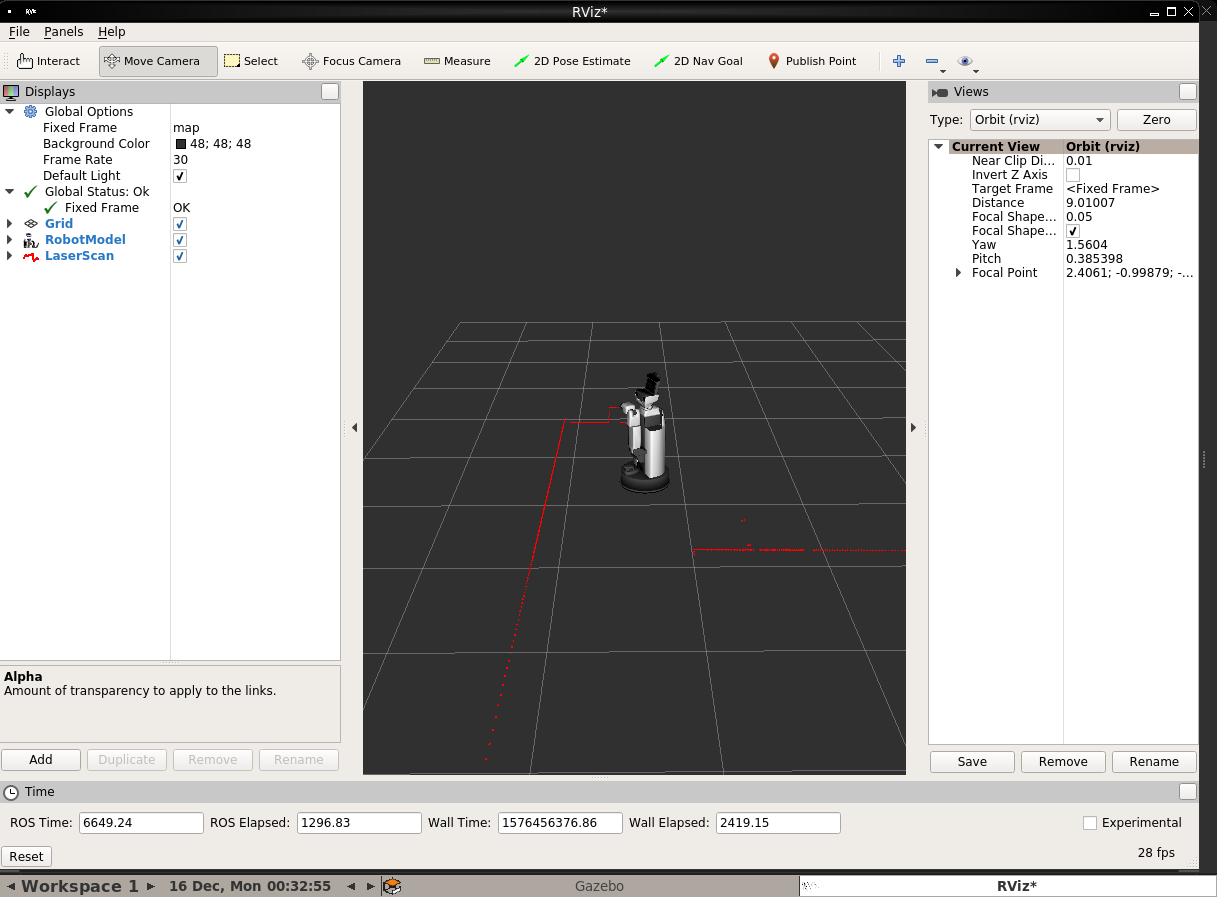

In [33]:
from IPython.display import Image
with open('/tmp/screen.png','rb') as file:
    display(Image(data=file.read()))

<div class="alert alert-block alert-info">
    <b>課題</b>
    <p>HSRが搭載している各種センサ情報をrviz上で確認しましょう。</p>
</div>

# センサ情報をプログラム上で利用する

センサ情報をプログラム上で利用してみましょう。ここでは、レーザスキャナの情報を利用してみます。

レーザスキャナの情報は「/hsrb/base_scan」トピックを使ってアクセスできます。

「rostopic info」コマンドを実行すると、トピックの詳細情報が表示されます。

In [8]:
!rostopic info /hsrb/base_scan

Type: sensor_msgs/LaserScan

Publishers: 
 * /gazebo (http://172.31.0.4:45831/)

Subscribers: 
 * /hsrb/laser_scan_matcher_node (http://172.31.0.4:46733/)
 * /amcl (http://172.31.0.4:36857/)
 * /move_base (http://172.31.0.4:43959/)




ここで重要なのはトピックに格納された値の「型情報」です。Pythonは「動的型付け言語」なので、通常プログラムを書くときには、型を事前に確認しないで書き始められますが、ROSのトピックにアクセスする場合に限り、事前に型情報が必要になります。

rostopic infoコマンドで確認すると、/hsrb/base_scanトピックの型は「sensor_msgs/LaserScan」であることがわかるので、以下のプログラムでセンサ値を取得できます。

In [1]:
import rospy
from sensor_msgs.msg import LaserScan

rospy.init_node("sensor_subscriber")

def callback(data):
    global scan_data
    scan_data = data

rospy.Subscriber("/hsrb/base_scan", LaserScan, callback)

プログラムの詳細は理解できなくてかまいませんが、トピック名（/hsrb/base_scan）を指定してROSトピックの購読者（Subscriber）を設定していることと、その際に変数の型（LaserScan）を設定していることを確認しておいてください。

取得されたセンサ値は、「scan_data」変数に格納しています。

scan_data変数に格納されたセンサ値の中身を見てみましょう。

In [11]:
scan_data

header: 
  seq: 44093
  stamp: 
    secs: 1500
    nsecs:  63000000
  frame_id: "base_range_sensor_link"
angle_min: -2.09999990463
angle_max: 2.09999990463
angle_increment: 0.00583333335817
time_increment: 0.0
scan_time: 0.0
range_min: 0.0500000007451
range_max: 60.0
ranges: [0.9756743907928467, 0.9750908613204956, 0.9745411276817322, 0.9740251898765564, 0.9735428690910339, 0.9730941653251648, 0.9726788997650146, 0.9722970724105835, 0.9719486236572266, 0.9716334342956543, 0.9713515639305115, 0.9711028337478638, 0.970887303352356, 0.9707048535346985, 0.9705554842948914, 0.9704391956329346, 0.9703559875488281, 0.9703057408332825, 0.9702885746955872, 0.9703043699264526, 0.9703532457351685, 0.9704350829124451, 0.970550000667572, 0.9706979990005493, 0.9708790183067322, 0.9710932374000549, 0.971340537071228, 0.9716210961341858, 0.9719348549842834, 0.9722819328308105, 0.9726623892784119, 0.9730762243270874, 0.9735235571861267, 0.9740044474601746, 0.9745190143585205, 0.9750673174858093, 0.9756

センサ値は、Pythonの「構造体」を使って格納されます。

構造体の中身は「変数名.構造体の要素名」でアクセスできます。

例えば、「angle_max」には、レーザスキャナのスキャン範囲（-120度から120度）がラジアンで格納されているようです。

In [2]:
import math
scan_data.angle_max / math.pi * 180

120.32113151332155

レーザスキャナのデータ本体は、「ranges」という名前の配列に格納されており、配列の長さは721のようです。

In [12]:
len(scan_data.ranges)

721

スキャン範囲（-120度から120度）上の各観測点がデータ化されているので、配列の真ん中（=361番目）の要素が「ロボット正面から壁までの距離」を表すと考えてよさそうです。

In [27]:
scan_data.ranges[360]

1.738580584526062

値からセンサ値の単位はメートルのようです。

# センサ値を使ってロボットを制御する

センサ値を使ってロボットを制御してみましょう。

センサ値の取得にはROSのトピックを使いましたが、ロボットの制御もトピック経由で行います。

HSRの台車は「/hsrb/command_velocity」トピックを使って制御できます。

まずは、rostopic infoコマンドを使って、トピックの型情報を確認しましょう。

In [3]:
!rostopic info /hsrb/command_velocity

Type: geometry_msgs/Twist

Publishers: 
 * /move_base (http://172.31.0.4:43959/)

Subscribers: 
 * /gazebo (http://172.31.0.4:45831/)




/hsrb/command_velocityトピックの型は「geometry_msgs/Twist」と分かったので、型を利用するための型情報をインポートします。

In [4]:
from geometry_msgs.msg import Twist

型情報から、値を格納するための変数を生成してみます。

linearとangularという要素から構成される構造体のようです。

In [5]:
twist = Twist()
twist

linear: 
  x: 0.0
  y: 0.0
  z: 0.0
angular: 
  x: 0.0
  y: 0.0
  z: 0.0

トピックの内容を購読者に対して送信するための「パブリッシャ（Publisher）」の設定を行います。

In [6]:
pub = rospy.Publisher('/hsrb/command_velocity', Twist, queue_size=1)

変数に制御値を格納します。

ここでは、直進方向に速度0.5で進む設定をしています。

In [7]:
twist.linear.x = 0.5

トピックの内容をパブリッシュします。

In [8]:
pub.publish(twist)

制御値を受けてロボットが少し前進することを確認してください。

HSRの台車は全方向に移動可能です。以下のように制御値を設定すると、真横に進みます。

In [10]:
twist = Twist()
twist.linear.y = 0.5
pub.publish(twist)

回転して向いている方向を変えたい場合は、以下のように制御値を設定してください（「z軸を中心とした回転をする」ように指令します）。

In [12]:
twist = Twist()
twist.angular.z = 0.5
pub.publish(twist)

ロボットの動作が確認できたら、壁の1メートル手前で止まる（壁の1メートル手前まで前進する）プログラムを書いてみましょう。

while文を使うと以下のように書けると思います。

In [11]:
while scan_data.ranges[360] > 1.0:
    twist = Twist()
    twist.linear.x = 0.5
    pub.publish(twist)

# プログラムの完成形

今回作った「壁の1メートル手前で止まる」プログラムは全体で以下のようになります。

In [1]:
# ROSをPythonから利用するためのライブラリのインポート
import rospy

# 利用する各トピックの型情報のインポート
from sensor_msgs.msg import LaserScan
from geometry_msgs.msg import Twist

# ROSの初期化
rospy.init_node("sensor_subscriber")

# レーザスキャナ情報を取得したときに呼ばれるコールバック関数
scan_data = None
def callback(data):
    global scan_data
    scan_data = data

# レーザスキャナの情報を購読する
rospy.Subscriber("/hsrb/base_scan", LaserScan, callback)

# 移動コマンドを発行するためのパブリッシャ
pub = rospy.Publisher('/hsrb/command_velocity', Twist, queue_size=1)

# scan_dataに最初の値が格納されるのを待つ
while not scan_data:
    rospy.sleep(1)

# 「壁の1メートル手前で止まる」アルゴリズム本体
while scan_data.ranges[360] > 1.0:
    twist = Twist()
    twist.linear.x = 0.5
    pub.publish(twist)

<div class="alert alert-block alert-info">
    <b>アドバンスド課題</b>
    <p>余裕がある人は「壁にぶつからないで部屋を動き回る」プログラムを書いてみましょう。</p>
</div>

<div class="alert alert-block alert-info">
    <b>次の学習</b>
    <p>レーザスキャナの値と部屋の形状をマッチングすることで、ロボットの絶対位置を計算する「自己位置推定」が可能になります。</p>
    <p>HSRに搭載されている自己位置推定に基づいた高度な移動機能を使ってみましょう。</p>
</div>